In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [126]:
df = pd.read_csv(r'C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\AI Work\Artificial-Intelligence\Excel_and_CSV\Position Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [127]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [128]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<Axes: ylabel='Salary'>

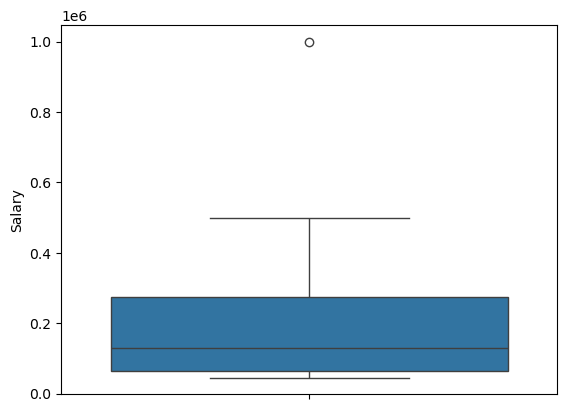

In [129]:
sns.boxplot(df['Salary'])

In [130]:
upper_limit = df['Salary'].mean() + 3 * df['Salary'].std()
lower_limit = df['Salary'].mean() - 3 * df['Salary'].std()

In [131]:
upper_limit,lower_limit

(1147621.6510028027, -648621.6510028027)

In [132]:
df.loc[(df['Salary']>upper_limit)|(df['Salary']<lower_limit)]

,Position,Level,Salary


In [133]:
df2 = df[(df['Salary']>=lower_limit)&(df['Salary']<=upper_limit)]

In [134]:
df2

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [135]:
model = LinearRegression()
scaler = StandardScaler()
re = Ridge()
ls = Lasso()
polyf = PolynomialFeatures(degree = 4)

In [136]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [137]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 42, test_size = .2)

In [138]:
scaler.fit(xtrain,xtest)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [139]:
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8451346684575975

In [140]:
xpoly = polyf.fit_transform(x)
polyf.fit(xpoly,y)

PolynomialFeatures(degree=4)

In [141]:
model2 = LinearRegression()

In [142]:
model2.fit(xpoly,y)

LinearRegression()

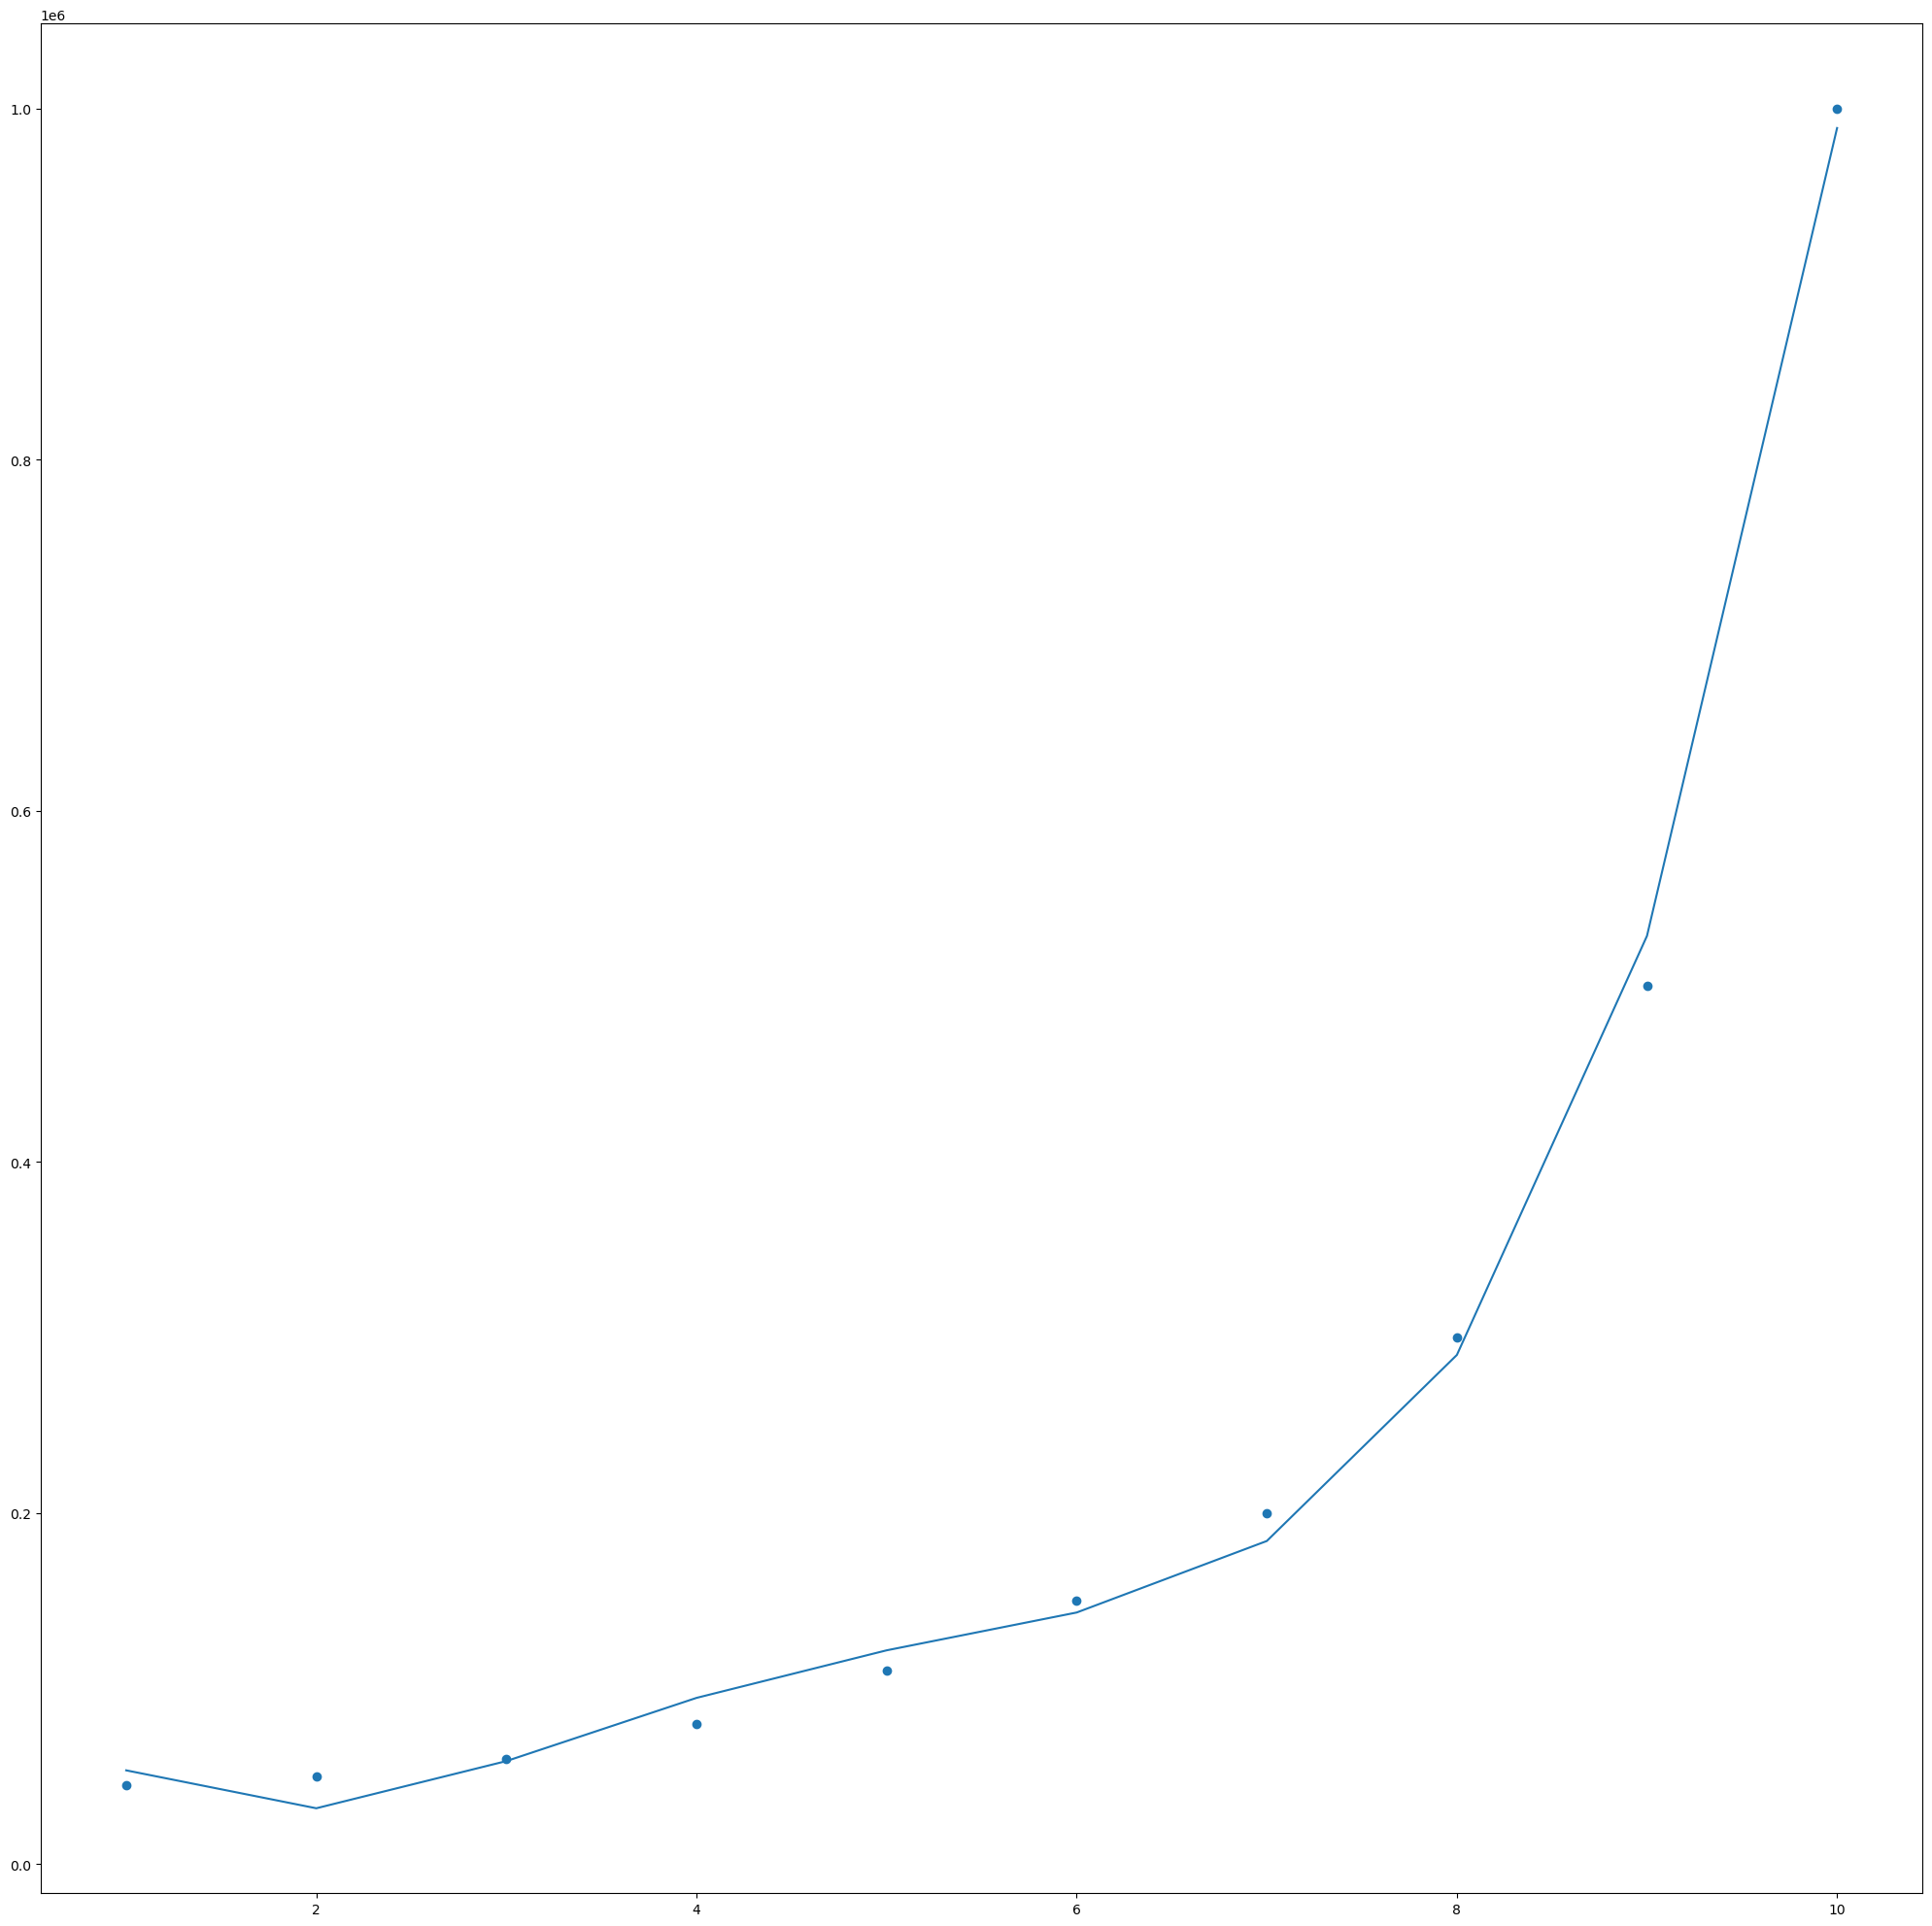

In [143]:
mp.figure(figsize = (25,25))
mp.scatter(x,y)
# mp.plot(x,model.predict(x))
mp.plot(x,model2.predict(polyf.fit_transform(x)))

In [144]:
xgrid = np.arange(min(x),max(x),0.1)
xgrid = xgrid.reshape(len(xgrid),1)
xgrid

C:\Users\Yagnesh Narola\AppData\Local\Temp\ipykernel_7276\3415795884.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xgrid = np.arange(min(x),max(x),0.1)


array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

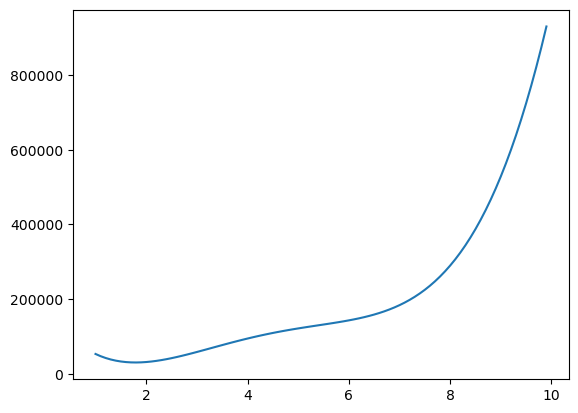

In [145]:
mp.plot(xgrid,model2.predict(polyf.fit_transform(xgrid)))

In [146]:
model.predict(np.array(6.5).reshape(1,-1))

array([331012.93103448])

In [147]:
model2.predict(polyf.fit_transform(np.array(6.5).reshape(1,-1)))

array([158862.45265153])